In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('drive/MyDrive/Exp_consolidated.csv')
data.head()

Unnamed: 0     EXP No  Speed  Feed  DoC  WoC  Coolant  Dir  Toolwear  \
0           0  DOE02_L01   3000  1400  0.5  0.6        1    1       0.0   
1           1  DOE02_L02   4000  2000  0.5  1.0        1    1       0.0   
2           2  DOE02_L03   2000   800  0.5  1.4        1    0       0.0   
3           3  DOE02_L04   1000   200  0.5  0.2        1    0       0.0   
4           4  DOE02_L05   2000   200  1.5  1.0        1    1       0.0   

       Ra       Rz  Mean Spindle Power  Mean MRR  
0  0.9121   5.0166          167.187627      0.42  
1  2.1492  10.2291          245.121265      1.00  
2  2.5493  10.7525           93.568688      0.56  
3  0.7172   4.3944           26.367502      0.02  
4  1.9792   9.1521           91.177596      0.30

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
xtrain=data[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytrain=data[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [5]:
data1=pd.read_csv("drive/MyDrive/Test_consolidated.csv")
xtest=data1[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant']]
ytest=data1[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [8]:
reg_pred=regression.predict(xtest)
reg_pred

array([[2.13700317],
       [2.4618129 ],
       [2.93888582],
       [1.30454855],
       [2.46170537],
       [2.34071208],
       [2.01905045],
       [2.51992324],
       [1.56638495],
       [2.32331666],
       [3.65449311],
       [2.71228771],
       [4.43095773],
       [2.09697934],
       [1.88740839],
       [2.58984804]])

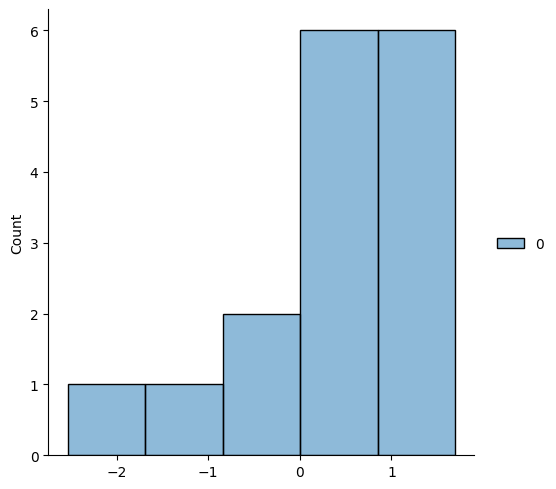

In [9]:
import seaborn as sns
sns.displot(reg_pred-ytest)

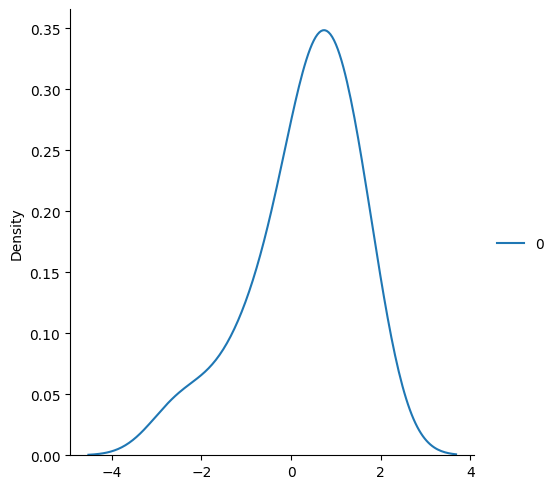

In [10]:
sns.displot(reg_pred-ytest,kind='kde')

In [11]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,ytest)
score

-1.5042727872197066

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(reg_pred,ytest)
mae

0.9655320013974997

In [13]:
mse=mean_squared_error(reg_pred,ytest)
mse

1.3381280996897855

Over fitting in the above general linear regression 
So in order to reduce the problem we are suing Lasso and Ridge regression

In [14]:
data.isna().sum()

Unnamed: 0            0
EXP No                0
Speed                 0
Feed                  0
DoC                   0
WoC                   0
Coolant               0
Dir                   0
Toolwear              0
Ra                    0
Rz                    0
Mean Spindle Power    0
Mean MRR              0
dtype: int64

In [15]:
from sklearn import linear_model

In [16]:
lasso_reg=linear_model.Lasso(alpha=4,max_iter=20,tol=0.1)
lasso_reg.fit(xtrain,ytrain)

Lasso(alpha=4, max_iter=20, tol=0.1)

In [17]:
pred=lasso_reg.predict(xtest)

In [18]:
mse1=mean_squared_error(pred,ytest)
mse1

1.64207698989483

In [19]:
lasso_reg.score(xtest,ytest)


-0.4355257581095049

By using the ridge

In [20]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=50,tol=0.1)
ridge_reg.fit(xtrain,ytrain)


Ridge(alpha=50, max_iter=50, tol=0.1)

In [21]:
pred_rid=ridge_reg.predict(xtest)
pred_rid

array([[2.19033056],
       [2.36957399],
       [2.38195731],
       [2.04994851],
       [2.04440517],
       [2.61006807],
       [2.47020615],
       [2.19151755],
       [1.91054084],
       [1.8854122 ],
       [3.183668  ],
       [2.93128462],
       [3.66996703],
       [2.64314866],
       [1.76416487],
       [2.32020495]])

In [22]:
ridge_reg.score(xtest,ytest)

-0.33291593534719177

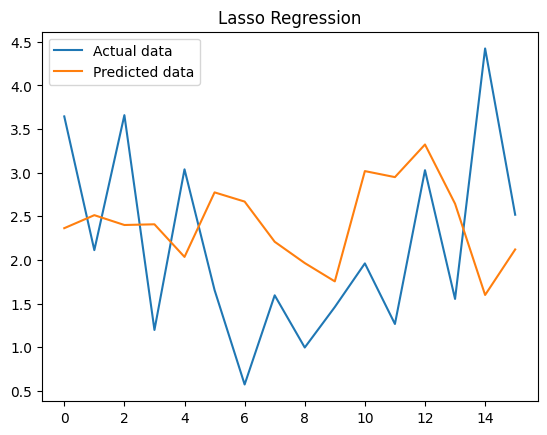

In [23]:
plt.plot(ytest, label="Actual data")
plt.plot(pred, label="Predicted data")
plt.title("Lasso Regression")
plt.legend()
plt.show()

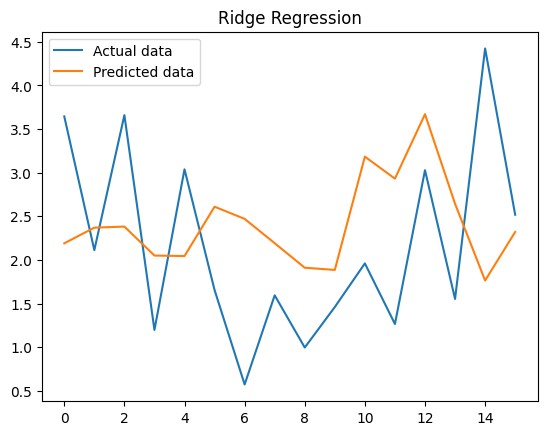

In [24]:
plt.plot(ytest, label="Actual data")
plt.plot(pred_rid, label="Predicted data")
plt.title("Ridge Regression")
plt.legend()
plt.show()

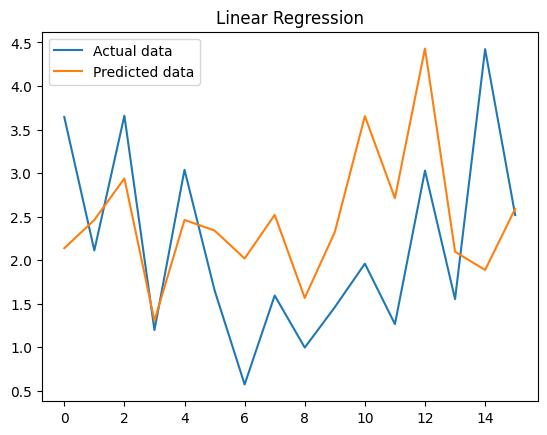

In [25]:
plt.plot(ytest, label="Actual data")
plt.plot(reg_pred, label="Predicted data")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [26]:
from google.colab import files
pd.DataFrame(reg_pred).to_csv('Ridge Output.csv') 
files.download('Ridge Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
pd.DataFrame(pred).to_csv('Lasso Output.csv') 
files.download('Lasso Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
pd.DataFrame(pred_rid).to_csv('Linear Regression Output.csv') 
files.download('Linear Regression Output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import pickle
file=open('linear.pkl','wb')
pickle.dump(regression,file)

In [30]:
import pickle
file=open('lasso.pkl','wb')
pickle.dump(lasso_reg,file)

In [31]:
import pickle
file=open('ridge.pkl','wb')
pickle.dump(ridge_reg,file)